In [283]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [224]:
# Create a list of all the LRP's of the bridges
df = pd.read_csv('Data_clean_N1_Dhaka_Chittagong_new.csv')
BridgeLRPlist = list()
for i in range(0,len(df)):
    if df.iloc[i,11] == 'BridgesDelay':
        BridgeLRPlist.append(df.iloc[i,3])

Text(0.5, 0.98, 'The average driving time for all scenarios')

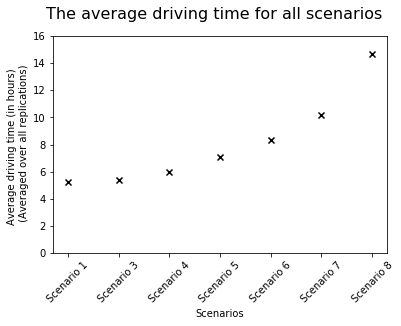

In [260]:
# Read in the data output of the Simio Experiments
df = pd.read_csv('Basic Bitch Case_Model_Experiment1_ResultsSummary.csv',sep=';')
# Use this list to drop all the rows that are road points and not bridges
# But first add the other objects that Simio ouputs
extra = ['Model', 'Rome' 'Source1', 'Trucks1']
for i in extra:
    BridgeLRPlist.append(i)
df_bridge = df[df['Object Name'].isin(BridgeLRPlist)]  
# Fix the comma's and make them into floats instead of strings
def replace(x):
    return x.replace(',', '.')
columns = list(df_bridge)[-5:]
for x in columns:
    df_bridge[x] = df_bridge[x].apply(replace)
    df_bridge[x] = df_bridge[x].astype(float)
# Drop all the rows that are 0 and get the rows with the right values in the specific columns for the first plot
dfp = df_bridge[df_bridge.Average != 0]
dfp = dfp[dfp['Data Item'] == 'TimeInSystem']
dfp = dfp[dfp['Statistic Type'] == 'Average (Hours)']
# Fix Typo
dfp.iloc[6,0] = 'Scenario 1'
# Sort the dataframe with Scenario 1 first (Easy for plotting)
dfs = dfp.sort_values(by = ['Scenario'],ascending = True)
#plot the data and set the labels and axes correctly
x = dfs['Scenario']
y = dfs['Average']
plt.scatter(x, y, marker='x', color = 'black')
plt.xticks(rotation=45)
plt.ylim(0, 16)
plt.xlabel('Scenarios')
plt.ylabel('Average driving time (in hours) \n (Averaged over all replications)')
plt.suptitle('The average driving time for all scenarios', fontsize=16)
#plt.savefig('ScenarioDrivingTime.png')

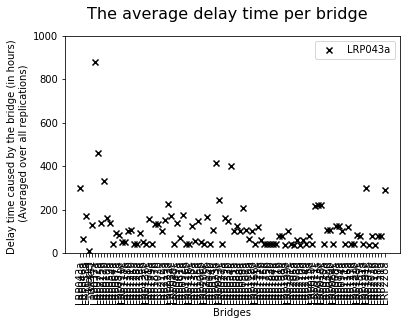

In [287]:
# Extract again the right data for this plot. We now only need all bridge data
dfp2 = df_bridge[df_bridge.Average != 0]
dfp2 = dfp2[dfp2['Object Name'].isin(BridgeLRPlist)] 
# Fix the same typo
for i in range(0,len(dfp2)):
    if dfp2.Scenario.iloc[i,] == 'Scenario1':
        dfp2.Scenario.iloc[i,] = 'Scenario 1' 
# Store all the averages of the delay times for all bridges into a dict
d = {}
l = dfp2['Object Name'].unique()
for i in l:
    df = dfp2[dfp2['Object Name'] == i]
    total = 0
    count = 0
    for j in range(0,len(df)):
        total = total + df.Average.iloc[j,]
        count += 1
    d[i] = total / count 
# Use this dict to make the plot
x = d.keys()
y = d.values()
plt.scatter(x,y, marker = 'x', color = 'black')
plt.legend(d.keys())
plt.xticks(rotation=90)
plt.ylim(0, 1000)
plt.xlabel('Bridges')
plt.ylabel('Delay time caused by the bridge (in hours) \n (Averaged over all replications)')
plt.suptitle('The average delay time per bridge', fontsize=16)
plt.show()